<a href="https://colab.research.google.com/github/christophergaughan/Bioinformatics-Code/blob/main/Kaggle_dog_breed_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Breed Classification from Images Using TensorFlow
***This notebook builds an end-to-end multi-class image classifier from Tensorflow 2.0 and  TensorFlow Hub***

## 1. Problem

Identifying a breed of a dog given the image of a dog.

If I take a picture of a dog, can I use this program to identfy its breed??

## 2. Data

The data we're using comes from the Kaggle data set from the Dog Breed Identificstion Competitition: https://www.kaggle.com/c/dog-breed-identification

## 3. Evaluation

Classification (think of accuracy): Specifically the Kaggle competition was looking at "Mult-Class_Log_Loss"

L_{\log}(y, p) = -(y \log (p) + (1 - y) \log (1 - p))

For each image in the test set, you must predict a probability for each of the different breeds. The file should contain a header and have the following format:

> id,affenpinscher,afghan_hound,..,yorkshire_terrier
000621fb3cbb32d8935728e48679680e,0.0083,0.0,...,0.0083
etc.

So the evaluation is a file with prediction probabilities for each dog breed of each test image.

see:    
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:

* We're dealing with images (i.e. unstructured data). So it's probably best that we are using deep-learning/transfer learning
* 120 breeds of dogs (i.e. 120 different classes)
* There are 10222 unique values or training images (these images have labels) and 10358 images in the test set (i.e. images with NO LABELS b/c we'll want to predict them)





In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
ls -la


total 16
drwxr-xr-x 1 root root 4096 Nov 18 14:36 ./
drwxr-xr-x 1 root root 4096 Nov 29 16:47 ../
drwxr-xr-x 4 root root 4096 Nov 18 14:35 .config/
drwxr-xr-x 1 root root 4096 Nov 18 14:36 sample_data/


In [3]:
cd ../

/


In [4]:
ls -la


total 116
drwxr-xr-x   1 root root 4096 Nov 29 16:47 ./
drwxr-xr-x   1 root root 4096 Nov 29 16:47 ../
drwxr-xr-x   1 root root 4096 Nov 18 14:27 bin/
drwxr-xr-x   2 root root 4096 Apr 24  2018 boot/
drwxr-xr-x   1 root root 4096 Nov 18 14:36 content/
drwxr-xr-x   1 root root 4096 Nov 23 14:12 datalab/
drwxr-xr-x   6 root root  460 Nov 29 16:46 dev/
-rwxr-xr-x   1 root root    0 Nov 29 16:42 .dockerenv*
drwxr-xr-x   1 root root 4096 Nov 29 16:42 etc/
drwx------   5 root root 4096 Nov 29 16:47 gdrive/
drwxr-xr-x   2 root root 4096 Apr 24  2018 home/
drwxr-xr-x   1 root root 4096 Nov 18 14:28 lib/
drwxr-xr-x   2 root root 4096 Nov 18 14:15 lib32/
drwxr-xr-x   1 root root 4096 Nov 18 14:15 lib64/
drwxr-xr-x   2 root root 4096 Nov 19  2020 media/
drwxr-xr-x   2 root root 4096 Nov 19  2020 mnt/
drwxr-xr-x   1 root root 4096 Nov 29 16:42 opt/
dr-xr-xr-x 216 root root    0 Nov 29 16:42 proc/
drwxr-xr-x  14 root root 4096 Nov 18 14:29 python-apt/
drwx------   1 root root 4096 Nov 29 16:42 root

In [5]:
cd gdrive/

/gdrive


In [6]:
ls -ltr

total 4
drwx------ 15 root root 4096 Nov 29 16:47 MyDrive/


In [7]:
cd MyDrive/

/gdrive/MyDrive


In [8]:
ls -la


total 228341
-rw------- 1 root root   257215 Nov  7  2014 '2014-07-03 11.26.24.jpg'
-rw------- 1 root root  7462037 Jun 20  2017  321AA485-724B-4214-BC7B-E8397CD418E3-d94c3902-3536-4bc1-96e9-6d615b34a99b.mov
-rw------- 1 root root  9704223 Jun 20  2017  42D58BA5-132D-4A56-AD0B-28C9DDB71A7D-5fab10bb-a7a6-457a-a62e-1984b579937f.mov
-rw------- 1 root root  9609389 Jun 20  2017  42D58BA5-132D-4A56-AD0B-28C9DDB71A7D-8298803d-4113-4fc2-8224-d7029a51c504.mov
-rw------- 1 root root  8018612 Jun 20  2017  90DB1D42-9616-46D4-B8E9-807F9F779FEE-8298803d-4113-4fc2-8224-d7029a51c504.mov
-rw------- 1 root root  7926493 Jun 20  2017  90DB1D42-9616-46D4-B8E9-807F9F779FEE-d94c3902-3536-4bc1-96e9-6d615b34a99b.mov
-rw------- 1 root root      151 May 31  2010  AccountSetupInfo_Chris.gdoc
-rw------- 1 root root      162 Feb 20  2014 '~$ail this.docx'
-rw------- 1 root root   131115 Jul  4 03:03  Albany_avocado.ipynb
-rw------- 1 root root   189960 Oct 28 23:09 'Assay Design Take Home.pdf'
-rw------- 1 root 

In [9]:
cd UDEMY_Nerual_Networks_Deep_learning/

/gdrive/MyDrive/UDEMY_Nerual_Networks_Deep_learning


In [10]:
ls -la

total 873
-rw------- 1 root root 289424 Feb 24  2021 'Copy of TF2.0 Loading Data.ipynb'
-rw------- 1 root root  55849 Feb 22  2021  daily-minimum-temperatures-in-me.csv
drwx------ 2 root root   4096 Nov 28 21:29  dog_test/
drwx------ 2 root root   4096 Nov 28 20:31  dog_train/
-rw------- 1 root root  28516 Nov 29 16:47  Kaggle-dog-breed-identification.ipynb
-rw------- 1 root root 482063 Nov 28 03:14  labels_Kaggle_dog.csv
-rw------- 1 root root  28023 Feb 19  2021  TF2.0Intro.ipynb


In [11]:
cd dog_test/

/gdrive/MyDrive/UDEMY_Nerual_Networks_Deep_learning/dog_test


In [12]:
cd ..

/gdrive/My Drive/UDEMY_Nerual_Networks_Deep_learning


In [13]:
ls -la

total 872
-rw------- 1 root root 289424 Feb 24  2021 'Copy of TF2.0 Loading Data.ipynb'
-rw------- 1 root root  55849 Feb 22  2021  daily-minimum-temperatures-in-me.csv
drwx------ 2 root root   4096 Nov 28 21:29  dog_test/
drwx------ 2 root root   4096 Nov 28 20:31  dog_train/
-rw------- 1 root root  28042 Nov 29 16:48  Kaggle-dog-breed-identification.ipynb
-rw------- 1 root root 482063 Nov 28 03:14  labels_Kaggle_dog.csv
-rw------- 1 root root  28023 Feb 19  2021  TF2.0Intro.ipynb


# Get our workspace ready
* Import TensorFlow 2.x
* Import TensorFlow Hub
* Make sure we're using a GPU 

In [14]:
# Import necessary tools 
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version: ", tf.__version__)
print("TF_Hub Version: ", hub.__version__)

TF Version:  2.7.0
TF_Hub Version:  0.12.0


# 

In [15]:
# check for GPU availability
print("GPU", "available!" if tf.config.list_physical_devices("GPU") else "not available")

GPU available!


In [16]:
ls -la

total 873
-rw------- 1 root root 289424 Feb 24  2021 'Copy of TF2.0 Loading Data.ipynb'
-rw------- 1 root root  55849 Feb 22  2021  daily-minimum-temperatures-in-me.csv
drwx------ 2 root root   4096 Nov 28 21:29  dog_test/
drwx------ 2 root root   4096 Nov 28 20:31  dog_train/
-rw------- 1 root root  28366 Nov 29 16:48  Kaggle-dog-breed-identification.ipynb
-rw------- 1 root root 482063 Nov 28 03:14  labels_Kaggle_dog.csv
-rw------- 1 root root  28023 Feb 19  2021  TF2.0Intro.ipynb


## Gettting our data ready (turning it into tensors)
With all machine learning models, our data has to be in numerical format. Turning our data into tensors (numerical format).

Let's start by accessing our data and checking the labels.

In [18]:
import pandas as pd
labels_csv = pd.read_csv("labels_Kaggle_dog.csv")

In [19]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [20]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,f3e172b6c77d1d5b191722de535bc726,scottish_deerhound
freq,1,126


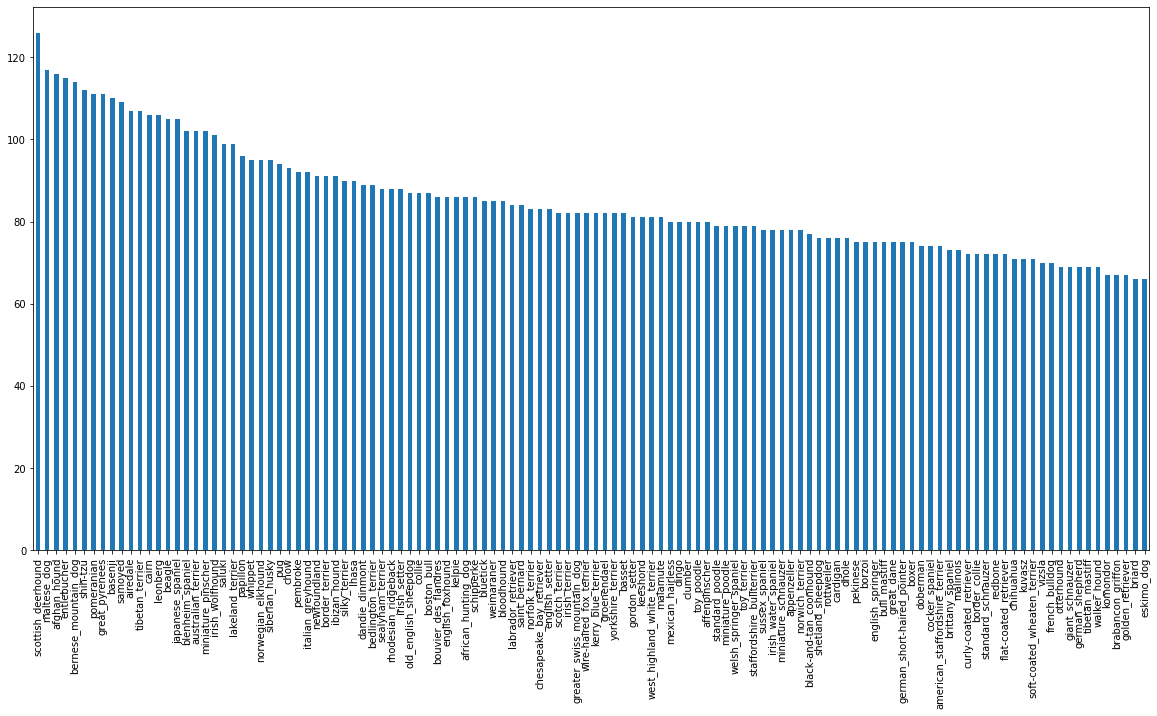

In [22]:
 # How many images are there of each breed
 labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [23]:
labels_csv["breed"].value_counts().median()

82.0

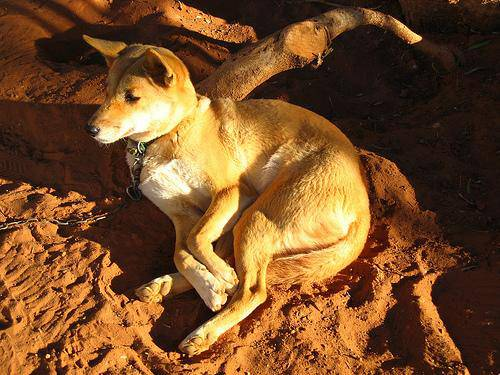

In [26]:
 # Let's view an image
 from IPython.display import Image
 Image("dog_train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting Images and their labels

Let's get a list of all our image file pathnames

In [27]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [30]:
# Create pathnames from image ID's
filenames = [fname for fname in labels_csv["id"]]

# Check the first ten
filenames[:10]

['000bec180eb18c7604dcecc8fe0dba07',
 '001513dfcb2ffafc82cccf4d8bbaba97',
 '001cdf01b096e06d78e9e5112d419397',
 '00214f311d5d2247d5dfe4fe24b2303d',
 '0021f9ceb3235effd7fcde7f7538ed62',
 '002211c81b498ef88e1b40b9abf84e1d',
 '00290d3e1fdd27226ba27a8ce248ce85',
 '002a283a315af96eaea0e28e7163b21b',
 '003df8b8a8b05244b1d920bb6cf451f9',
 '0042188c895a2f14ef64a918ed9c7b64']